# Análise de dados de jogadores da NBA

Isabela Marinho Ribeiro (imr)

Lucas e Silva de Souza (lss8)

## Glossário das features

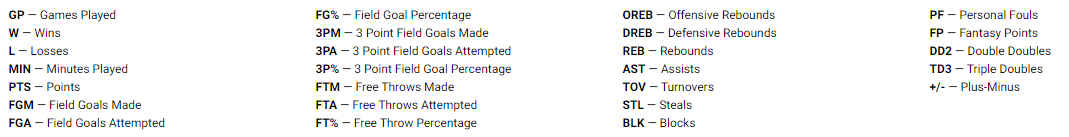

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
np.random.seed(10)

from sklearn.preprocessing import MinMaxScaler

### Importando o dataset

In [83]:
df = pd.read_csv('NBA_Players_Stats.csv', sep=';')

In [84]:
dfTESTE = pd.read_csv('NBA_Players_Stats.csv', sep=';')

In [62]:
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,AJ Griffin,ATL,20,20,8,12,170.7,48,18,62,...,18,5,8,1,2,6,78,0,0,-51
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333,471,1100,...,272,247,112,96,26,179,2284,1,0,127
2,Bruno Fernando,ATL,25,45,20,25,682.3,282,109,187,...,193,46,44,25,28,107,698,0,0,-96
3,Clint Capela,ATL,29,73,33,40,1883.1,836,353,618,...,776,91,74,43,106,164,2277,38,0,-17
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891,304,663,...,222,87,83,40,16,146,1373,3,0,-49


In [4]:
df.shape

(571, 29)

### Definição de tipos

In [7]:
df.dtypes

PLAYER     object
TEAM       object
AGE         int64
GP          int64
W           int64
L           int64
MIN       float64
PTS       float64
FGM         int64
FGA         int64
FG%       float64
3PM         int64
3PA         int64
3P%       float64
FTM         int64
FTA         int64
FT%       float64
OREB        int64
DREB        int64
REB         int64
AST         int64
TOV         int64
STL         int64
BLK         int64
PF          int64
FP          int64
DD2         int64
TD3         int64
+/-         int64
dtype: object

In [63]:
df['TEAMID'] = df['TEAM'].astype('category')

In [64]:
df['TEAMID'] = df['TEAMID'].cat.codes

In [65]:
df[['TEAM','TEAMID']]

,TEAM,TEAMID
0,ATL,0
1,ATL,0
2,ATL,0
3,ATL,0
4,ATL,0
...,...,...
566,WAS,29
567,WAS,29
568,WAS,29
569,WAS,29


### Limpeza de dados

#### Remoção aleatória de dados para tratar dados ausentes

In [26]:
df.isnull().any()

PLAYER    False
TEAM      False
AGE       False
GP        False
W         False
L         False
MIN       False
PTS       False
FGM       False
FGA       False
FG%       False
3PM       False
3PA       False
3P%       False
FTM       False
FTA       False
FT%       False
OREB      False
DREB      False
REB       False
AST       False
TOV       False
STL       False
BLK       False
PF        False
FP        False
DD2       False
TD3       False
+/-       False
TEAMID    False
dtype: bool

In [85]:
nan_indices = np.random.choice(df.index, 30, replace=False)
df.loc[nan_indices, 'PTS'] = np.nan

nulldf = df[df['PTS'].isna()]
nulldf.PTS

12    NaN
65    NaN
81    NaN
116   NaN
119   NaN
120   NaN
151   NaN
193   NaN
217   NaN
220   NaN
253   NaN
258   NaN
268   NaN
282   NaN
301   NaN
303   NaN
327   NaN
344   NaN
352   NaN
363   NaN
372   NaN
407   NaN
428   NaN
435   NaN
461   NaN
462   NaN
498   NaN
517   NaN
519   NaN
523   NaN
Name: PTS, dtype: float64

In [86]:
nan_indices = np.random.choice(dfTESTE.index, 30, replace=False)
dfTESTE.loc[nan_indices, 'PTS'] = np.nan

nulldfTESTE = dfTESTE[dfTESTE['PTS'].isna()]
nulldfTESTE.PTS

14    NaN
29    NaN
31    NaN
76    NaN
80    NaN
137   NaN
148   NaN
175   NaN
182   NaN
188   NaN
204   NaN
217   NaN
219   NaN
220   NaN
243   NaN
252   NaN
284   NaN
302   NaN
305   NaN
418   NaN
420   NaN
434   NaN
443   NaN
451   NaN
456   NaN
468   NaN
510   NaN
532   NaN
536   NaN
541   NaN
Name: PTS, dtype: float64

In [87]:
dfTESTE['PPG'] = dfTESTE['PTS']/dfTESTE['GP']
dfTESTE.head(10)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,PPG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,5,8,1,2,6,78,0,0,-51,2.400000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,247,112,96,26,179,2284,1,0,127,16.873418
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,46,44,25,28,107,698,0,0,-96,6.266667
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,91,74,43,106,164,2277,38,0,-17,11.452055
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,87,83,40,16,146,1373,3,0,-49,15.631579
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,502,201,111,24,138,3209,20,1,-154,22.474359
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,10,2,2,0,6,81,0,0,-16,2.529412
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,37,19,20,8,115,556,0,0,-97,4.924242
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,203,101,67,47,133,2027,19,1,-76,16.000000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,27,10,7,5,20,187,0,0,-35,4.764706


In [92]:
dfTESTE.PPG.describe()

count    541.000000
mean       8.362202
std        6.768406
min        0.000000
25%        3.377778
50%        6.275000
75%       11.635135
max       34.692308
Name: PPG, dtype: float64

In [90]:
df.PTS.describe()

count     541.000000
mean      489.682070
std       511.398336
min         0.000000
25%        75.000000
50%       303.000000
75%       776.000000
max      2370.000000
Name: PTS, dtype: float64

#### Tratamento de dados ausentes

##### MEDIA

In [91]:
# Creating a secondary dataset withoun rows with null values
df_clean = df.dropna(subset=['PTS'])

# Calculating Points Per Game with valid cells
totalPPG = df_clean.PTS.sum()/df_clean.GP.sum()

print(totalPPG)

10.634152215799615


In [68]:
def generatePTS_values(row):
  return totalPPG * row['GP']

df.loc[df['PTS'].isna(), 'PTS'] = df[df['PTS'].isna()].apply(generatePTS_values,)

In [73]:
df_inputed = df.loc[nulldf.index]
df_inputed

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,nullINDEX
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,830.307558,471,1100,...,112,96,26,179,2284,1,0,127,0,NaN
24,Dennis Schroder,BKN,30,80,30,50,2485.9,840.817781,403,927,...,153,63,17,164,2231,8,0,-126,1,NaN
46,Luke Kornet,BOS,28,63,48,15,983.3,662.144002,142,203,...,21,23,61,77,979,1,0,218,2,NaN
64,LaMelo Ball,CHA,22,22,7,15,711.4,231.224890,183,423,...,83,40,4,79,975,7,1,-139,3,NaN
80,Coby White,CHI,24,79,37,42,2881.4,830.307558,541,1209,...,166,53,18,186,2593,5,0,-35,4,NaN
81,Dalen Terry,CHI,21,59,27,32,680.7,620.103113,69,157,...,32,27,18,81,540,0,0,36,4,NaN
119,Dwight Powell,DAL,32,63,38,25,836.3,662.144002,72,106,...,32,26,20,113,697,1,0,3,6,NaN
124,Luka Doncic,DAL,25,70,46,24,2624.0,735.715558,804,1652,...,282,99,38,149,4304,49,21,319,6,NaN
147,Ausar Thompson,DET,21,63,10,53,1582.8,662.144002,232,480,...,84,68,59,175,1515,2,0,-231,8,NaN
164,Marcus Sasser,DET,23,71,11,60,1351.1,746.225780,219,512,...,90,44,12,103,1168,1,0,-250,8,NaN


##### MEDIANA

In [ ]:
# Creating a secondary dataset withoun rows with null values
df_clean = df.dropna(subset=['PTS'])

# Calculating Points Per Game with valid cells
totalPPG = df_clean.PTS.sum()/df_clean.GP.sum()

print(totalPPG)

### Normalização

In [ ]:
# TODO: definir se a escala é entre -1 e 1 ou 0 e 1
scaler = MinMaxScaler(feature_range=(-1, 1))

## Análises preliminares

### Quem é o jogador que mais pontua?

In [ ]:
df.iloc[df.PTS.idxmax()]

PLAYER    Luka Doncic
TEAM              DAL
AGE                25
GP                 70
W                  46
L                  24
MIN            2624.0
PTS              2370
FGM               804
FGA              1652
FG%              48.7
3PM               284
3PA               744
3P%              38.2
FTM               478
FTA               608
FT%              78.6
OREB               59
DREB              588
REB               647
AST               686
TOV               282
STL                99
BLK                38
PF                149
FP               4304
DD2                49
TD3                21
+/-               319
Name: 124, dtype: object

### Qual é a média de pontos por jogo desse jogador?

In [ ]:
df.PTS.iloc[df.PTS.idxmax()] / df.GP.iloc[df.PTS.idxmax()]

33.857142857142854

### Quem é o jogador que menos pontua e qual sua média de pontos por jogo?

In [ ]:
df.iloc[df.PTS.idxmin()]

PLAYER    Andrew Funk
TEAM              CHI
AGE                24
GP                  5
W                   3
L                   2
MIN              13.4
PTS                 0
FGM                 0
FGA                 4
FG%               0.0
3PM                 0
3PA                 3
3P%               0.0
FTM                 0
FTA                 0
FT%               0.0
OREB                0
DREB                0
REB                 0
AST                 0
TOV                 0
STL                 1
BLK                 1
PF                  0
FP                  6
DD2                 0
TD3                 0
+/-                 4
Name: 78, dtype: object

In [ ]:
df.PTS.iloc[df.PTS.idxmin()] / df.GP.iloc[df.PTS.idxmin()]

0.0

### Qual jogador mais jogou em minutos?

In [ ]:
df.iloc[df.MIN.idxmax()]

PLAYER    DeMar DeRozan
TEAM                CHI
AGE                  34
GP                   79
W                    37
L                    42
MIN              2988.6
PTS                1897
FGM                 650
FGA                1355
FG%                48.0
3PM                  75
3PA                 225
3P%                33.3
FTM                 522
FTA                 612
FT%                85.3
OREB                 43
DREB                297
REB                 340
AST                 421
TOV                 135
STL                  90
BLK                  45
PF                  161
FP                 3207
DD2                   7
TD3                   0
+/-                 -62
Name: 82, dtype: object

### Qual a média de minutos jogados por partida para esse jogador?

In [ ]:
df.MIN.iloc[df.MIN.idxmax()] / df.GP.iloc[df.MIN.idxmax()]

37.83037974683544